#  Case Study 1

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
customer = pd.read_csv("Customer.csv")
product  = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")
#

In [102]:
product.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
prod_trans = pd.merge(left=transaction, right=product,on=["prod_cat_code","prod_subcat_code"],how="left")
prod_trans.rename(columns={"cust_id":"customer_Id"},inplace=True)
full_list = pd.merge(left = customer,right = prod_trans,on=["customer_Id"],how="left")
full_list

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,27-12-1992,F,5.0,7.136903e+10,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools
23190,269626,27-12-1992,F,5.0,9.413405e+10,7/7/2011,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids
23191,274308,29-12-1992,F,5.0,2.620869e+10,22-10-2012,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens
23192,274308,29-12-1992,F,5.0,5.735882e+10,5/9/2012,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens


In [103]:
full_list.dtypes
# customer

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id      float64
tran_date            object
prod_subcat_code    float64
prod_cat_code       float64
Qty                 float64
Rate                float64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [104]:
full_list.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids
5,268408,02-01-1970,M,4.0,5.690286e+10,30-01-2013,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,Cameras
6,268408,02-01-1970,M,4.0,5.684453e+10,14-10-2012,1.0,2.0,5.0,1175.0,616.875,6491.875,MBR,Footwear,Mens
7,268408,02-01-1970,M,4.0,1.951606e+10,7/9/2012,10.0,3.0,4.0,650.0,273.000,2873.000,e-Shop,Electronics,Audio and video
8,268408,02-01-1970,M,4.0,1.264450e+10,14-08-2012,4.0,4.0,3.0,321.0,101.115,1064.115,TeleShop,Bags,Women
9,268408,02-01-1970,M,4.0,6.331455e+10,26-04-2012,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,Clothing,Women


In [105]:
full_list.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23184,270476,25-12-1992,F,3.0,7.803441e+10,13-08-2013,11.0,6.0,1.0,971.0,101.955,1072.955,TeleShop,Home and kitchen,Bath
23185,270476,25-12-1992,F,3.0,3.359888e+09,16-03-2013,10.0,3.0,4.0,361.0,151.620,1595.620,MBR,Electronics,Audio and video
23186,270476,25-12-1992,F,3.0,2.288339e+10,22-05-2012,4.0,2.0,4.0,898.0,377.160,3969.160,Flagship store,Footwear,Kids
23187,270476,25-12-1992,F,3.0,1.972519e+10,21-02-2012,4.0,4.0,4.0,618.0,259.560,2731.560,e-Shop,Bags,Women
23188,270476,25-12-1992,F,3.0,8.547516e+10,9/8/2011,5.0,3.0,5.0,1354.0,710.850,7480.850,Flagship store,Electronics,Computers
23189,269626,27-12-1992,F,5.0,7.136903e+10,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools
23190,269626,27-12-1992,F,5.0,9.413405e+10,7/7/2011,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids
23191,274308,29-12-1992,F,5.0,2.620869e+10,22-10-2012,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens
23192,274308,29-12-1992,F,5.0,5.735882e+10,5/9/2012,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens
23193,274308,29-12-1992,F,5.0,5.816054e+10,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,Academic


In [106]:
full_list.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23194.000000,23186.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.480204,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.350129,2.863884,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [107]:
full_list.loc[:,full_list.dtypes=="object"].describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23194,23185,23053,23053,23053,23053
unique,4056,2,1129,4,6,18
top,17-09-1982,M,13-07-2011,e-Shop,Books,Women
freq,32,11877,35,9311,6069,3048


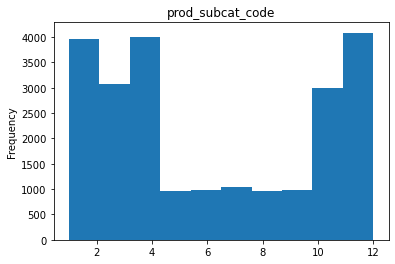

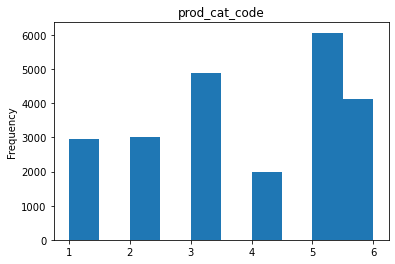

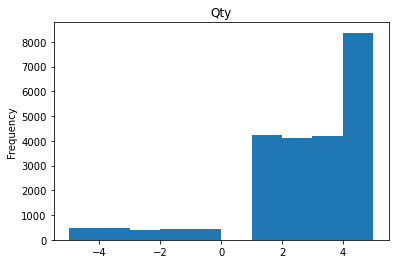

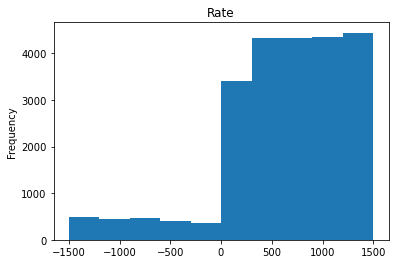

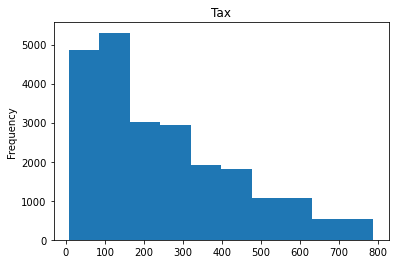

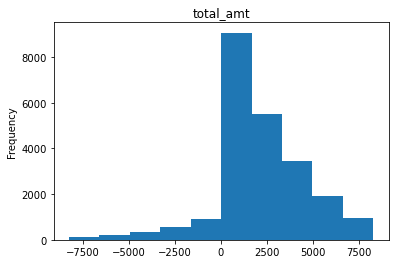

In [129]:
column =full_list.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
for col in ['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']:
    column[col].plot(kind="hist")
    plt.title(col)
    plt.show()


In [125]:
# full_list[]
fl_not_nan = full_list.loc[ full_list.tran_date.notnull()].sort_values(by=["tran_date"])
fl_not_nan["tran_date"] = pd.to_datetime(fl_not_nan["tran_date"])
print("BETWEEN/,fl_not_nan["tran_date"].max(),"AND",fl_not_nan["tran_date"].min())

BETWEEN 2014-12-02 00:00:00 AND 2011-01-02 00:00:00


In [127]:
full_list["Qty"].loc[full_list["Qty"]<0].count()

2177